In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')
sns.set_context('talk')
from scipy.stats import pearsonr
from scipy.stats import t
from datetime import datetime, timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
dataset = pd.read_csv('/Users/chiguo/Downloads/QVI_data.csv')

In [4]:
df = dataset.copy()

In [5]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [6]:
df.shape

(264834, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [8]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [9]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
df['BRAND'].value_counts()

KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [11]:
df['PACK_SIZE'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE, dtype: int64

In [12]:
# for the ease of selecting by month, we transform the date to a yearmonth format
df['DATE'] = pd.to_datetime(df['DATE'])

In [13]:
df['DATE_MTH'] = df['DATE'].dt.strftime('%Y%m').astype('int64')

In [14]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,DATE_MTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


### Next we will be building functions to compare different controls stores to each of the trial stores regarding the below three dimensions with a combination of Pearson correlations and magnitude distance:
- total sales revenue
- total number of customers
- average number of transactions per customer

In [15]:
def transform(df):
    # use groupby function to get total sales, total customer number, and total transaction number
    df_metrics = df.groupby(['STORE_NBR', 'DATE_MTH']).agg({'LYLTY_CARD_NBR':(lambda x: x.nunique()),'TXN_ID':(lambda x: x.nunique()), 'TOT_SALES': 'sum', 'PROD_QTY': 'sum'})
    df_metrics.reset_index(inplace = True)
    # rename the columns
    df_metrics.rename (columns = {'LYLTY_CARD_NBR':'TOT_CUST_NO', 'TXN_ID':'TOT_TXN_NO', 'PROD_QTY':'TOT_QTY'}, inplace = True)
    # get the average number of transactions per customer
    df_metrics['AVG_TXN_CUST'] = df_metrics['TOT_TXN_NO']/df_metrics['TOT_CUST_NO']
    return df_metrics

In [16]:
df['STORE_NBR'].nunique()

272

In [17]:
df_metrics = transform(df)
df_metrics.head()

,STORE_NBR,DATE_MTH,TOT_CUST_NO,TOT_TXN_NO,TOT_SALES,TOT_QTY,AVG_TXN_CUST
0,1,201807,49,52,206.9,62,1.061224
1,1,201808,42,43,176.1,54,1.023810
2,1,201809,59,62,278.8,75,1.050847
3,1,201810,44,45,188.1,58,1.022727
4,1,201811,46,47,192.6,57,1.021739
...,...,...,...,...,...,...,...
3164,272,201902,45,48,395.5,91,1.066667
3165,272,201903,50,53,442.3,101,1.060000
3166,272,201904,54,55,445.1,105,1.018519
3167,272,201905,34,40,314.6,71,1.176471


In [18]:
def remove_null(df):
    full_obs = pd.pivot_table(df, index = 'STORE_NBR', columns = 'DATE_MTH', values = 'TOT_SALES')
    # get the store numbers that have missing records
    null_list = full_obs[full_obs.isnull().any(axis=1)].index.to_list()
    print('The stores that have missing records during the whole period are as below' + '\n' + str(null_list))
    # remove stores with missing records from the dataset
    df_metrics = df[~df['STORE_NBR'].isin(null_list)]
    print('Now we have ' + str(df_metrics['STORE_NBR'].nunique()) + ' in our dataset')
    
    return df_metrics

In [77]:
df_metrics = remove_null(df_metrics)
df_metrics.head()

The stores that have missing records during the whole period are as below
[]
Now we have 260 in our dataset


,STORE_NBR,DATE_MTH,TOT_CUST_NO,TOT_TXN_NO,TOT_SALES,TOT_QTY,AVG_TXN_CUST
0,1,201807,49,52,206.9,62,1.061224
1,1,201808,42,43,176.1,54,1.023810
2,1,201809,59,62,278.8,75,1.050847
3,1,201810,44,45,188.1,58,1.022727
4,1,201811,46,47,192.6,57,1.021739


In [20]:
df_metrics['DATE_MTH'].unique()

array([201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902,
       201903, 201904, 201905, 201906])

In [21]:
trial_store_list = [77, 86, 88]
trial_period = [201902, 201903, 201904]
pre_trial_period = [201807, 201808, 201809, 201810, 201811, 201812, 201901]
post_trial_period = [201905, 201906]

In [22]:
df_pre_trial = df_metrics[(df_metrics['STORE_NBR'].isin(trial_store_list)) & (df_metrics['DATE_MTH'].isin(pre_trial_period))]
df_pre_control = df_metrics[(~df_metrics['STORE_NBR'].isin(trial_store_list)) & (df_metrics['DATE_MTH'].isin(pre_trial_period))]

In [23]:
metrics = ['TOT_SALES','TOT_CUST_NO','TOT_QTY']

In [24]:
def cal_corr(df_pre_trial, df_pre_control):
    df_corr = pd.DataFrame({'trial_store': [], 'control_store': [], 'corr_value': []})
    for j in df_pre_trial['STORE_NBR'].unique():
        for k in df_pre_control['STORE_NBR'].unique():
            for i in metrics:
                corr, _ = pearsonr(df_pre_trial.loc[df_pre_trial['STORE_NBR'] == j,i], df_pre_control.loc[df_pre_control['STORE_NBR'] == k,i])
                df_corr = df_corr.append({'trial_store': j, 'control_store': k, 'corr_value': corr}, ignore_index = True)

    df_corr = df_corr.groupby(['trial_store', 'control_store']).agg({'corr_value': 'mean'})
    df_corr.reset_index(inplace = True)
    return df_corr

In [75]:
df_corr = cal_corr(df_pre_trial, df_pre_control)
df_corr.head()

,trial_store,control_store,corr_value
0,77.0,1.0,0.202251
1,77.0,2.0,-0.243305
2,77.0,3.0,0.795156
3,77.0,4.0,-0.224132
4,77.0,5.0,0.232860


In [26]:
def cal_mag_diff(df_pre_trial, df_pre_control):
    df_mag = pd.DataFrame({'trial_store': [], 'control_store': [], 'mag_value': []})
    for j in df_pre_trial['STORE_NBR'].unique():
        for k in df_pre_control['STORE_NBR'].unique():
            for i in metrics:
                trial = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == j,i]
                trial.reset_index(drop = True, inplace = True)
                control = df_pre_control.loc[df_pre_control['STORE_NBR'] == k,i] 
                control.reset_index(drop = True, inplace = True)
                
                ob_distance = np.abs(trial - control)
                mag_diff = np.mean(1 - (ob_distance - min(ob_distance))/(max(ob_distance) - min(ob_distance)))
                df_mag = df_mag.append({'trial_store': j, 'control_store': k, 'mag_diff': mag_diff}, ignore_index = True)
    
    df_mag = df_mag.groupby(['trial_store', 'control_store']).agg({'mag_diff': 'mean'})
    df_mag.reset_index(inplace = True)
    return df_mag


In [74]:
df_mag = cal_mag_diff(df_pre_trial, df_pre_control)
df_mag.head()

,trial_store,control_store,mag_diff
0,77.0,1.0,0.516073
1,77.0,2.0,0.510531
2,77.0,3.0,0.485718
3,77.0,4.0,0.569661
4,77.0,5.0,0.481186


In [28]:
def merge_matrics(df_corr, df_mag):
    df_measure = df_corr.merge(df_mag, on=["trial_store","control_store"])
    df_measure['score'] = 0.5 * df_measure['corr_value'] + 0.5 * df_measure['mag_diff']
    return df_measure

In [76]:
df_measure = merge_matrics(df_corr, df_mag)
df_measure.head()

,trial_store,control_store,corr_value,mag_diff,score
0,77.0,1.0,0.202251,0.516073,0.359162
1,77.0,2.0,-0.243305,0.510531,0.133613
2,77.0,3.0,0.795156,0.485718,0.640437
3,77.0,4.0,-0.224132,0.569661,0.172764
4,77.0,5.0,0.232860,0.481186,0.357023


In [30]:
def find_highest_score(trial_store_number):
    control_store = []
    df_trial_store = df_measure.loc[df_measure['trial_store'] == trial_store_number]
    matching_store = df_trial_store.loc[df_trial_store['score'].isin(df_trial_store['score'].nlargest(n=7))]['control_store'].values
    matching_store = matching_store.tolist()
    print(str(trial_store_number) + 's control store is ' + str(matching_store))
    return matching_store

In [31]:
find_highest_score(77)

77s control store is [3.0, 27.0, 41.0, 71.0, 115.0, 119.0, 233.0]


[3.0, 27.0, 41.0, 71.0, 115.0, 119.0, 233.0]

In [32]:
find_highest_score(86)

86s control store is [75.0, 109.0, 114.0, 138.0, 155.0, 222.0, 260.0]


[75.0, 109.0, 114.0, 138.0, 155.0, 222.0, 260.0]

In [33]:
find_highest_score(88)

88s control store is [14.0, 134.0, 159.0, 178.0, 187.0, 204.0, 237.0]


[14.0, 134.0, 159.0, 178.0, 187.0, 204.0, 237.0]

In [34]:
def add_store_type(trial_store_number, control_store_number):
    df_metrics_copy = df_metrics.copy()
    store_type = []

    for i in df_metrics_copy['STORE_NBR']:
        if i in trial_store_list:
            store_type.append('Trial_Store')
        elif i == control_store_number:
            store_type.append('Control_Store')
        else:
            store_type.append('Other_Stores')
    
    df_metrics_copy['STORE_TYPE'] = store_type
    return df_metrics_copy

In [35]:
def store_group_pre_trial(trial_store_number, control_store_number):
    df_metrics_pre = add_store_type(trial_store_number, control_store_number)
    df_pre_trial = df_metrics_pre.loc[(df_metrics_pre['STORE_NBR']==trial_store_number) & (df_metrics_pre['DATE_MTH'].isin(pre_trial_period))][['STORE_TYPE','DATE_MTH','TOT_CUST_NO','TOT_SALES','TOT_QTY']]
    df_pre_control = df_metrics_pre.loc[(df_metrics_pre['STORE_NBR']==control_store_number) & (df_metrics_pre['DATE_MTH'].isin(pre_trial_period))][['STORE_TYPE','DATE_MTH','TOT_CUST_NO','TOT_SALES','TOT_QTY']]
    df_pre_other = df_metrics_pre.loc[(df_metrics_pre['STORE_TYPE']=='Other_Stores') & (df_metrics_pre['DATE_MTH'].isin(pre_trial_period))].groupby(['STORE_TYPE','DATE_MTH']).agg({'TOT_CUST_NO': 'mean', 'TOT_SALES': 'mean', 'TOT_QTY': 'mean'})
    df_pre_other.reset_index(inplace = True)
    df_combined = pd.concat([df_pre_trial, df_pre_control, df_pre_other], axis = 0)
    return df_combined

In [36]:
def store_plot_pre_trial(trial_store_number, control_store_number): 
    df_combined = store_group_pre_trial(trial_store_number,control_store_number)
    
    fig, axes = plt.subplots(3, 1,  figsize=(32,24))
    sns.lineplot(ax = axes[0], 
                       data = df_combined, 
                       x = 'DATE_MTH', 
                       y = 'TOT_CUST_NO', 
                       hue = 'STORE_TYPE', 
                       linewidth =2, 
                       )

    sns.lineplot(ax = axes[1], 
                       data = df_combined, 
                       x = 'DATE_MTH', 
                       y = 'TOT_SALES', 
                       hue = 'STORE_TYPE', 
                       linewidth =2, 
                       )

    sns.lineplot(ax = axes[2], 
                       data = df_combined, 
                       x = 'DATE_MTH', 
                       y = 'TOT_QTY', 
                       hue = 'STORE_TYPE', 
                       linewidth =2, 
                       )
    plt.show()

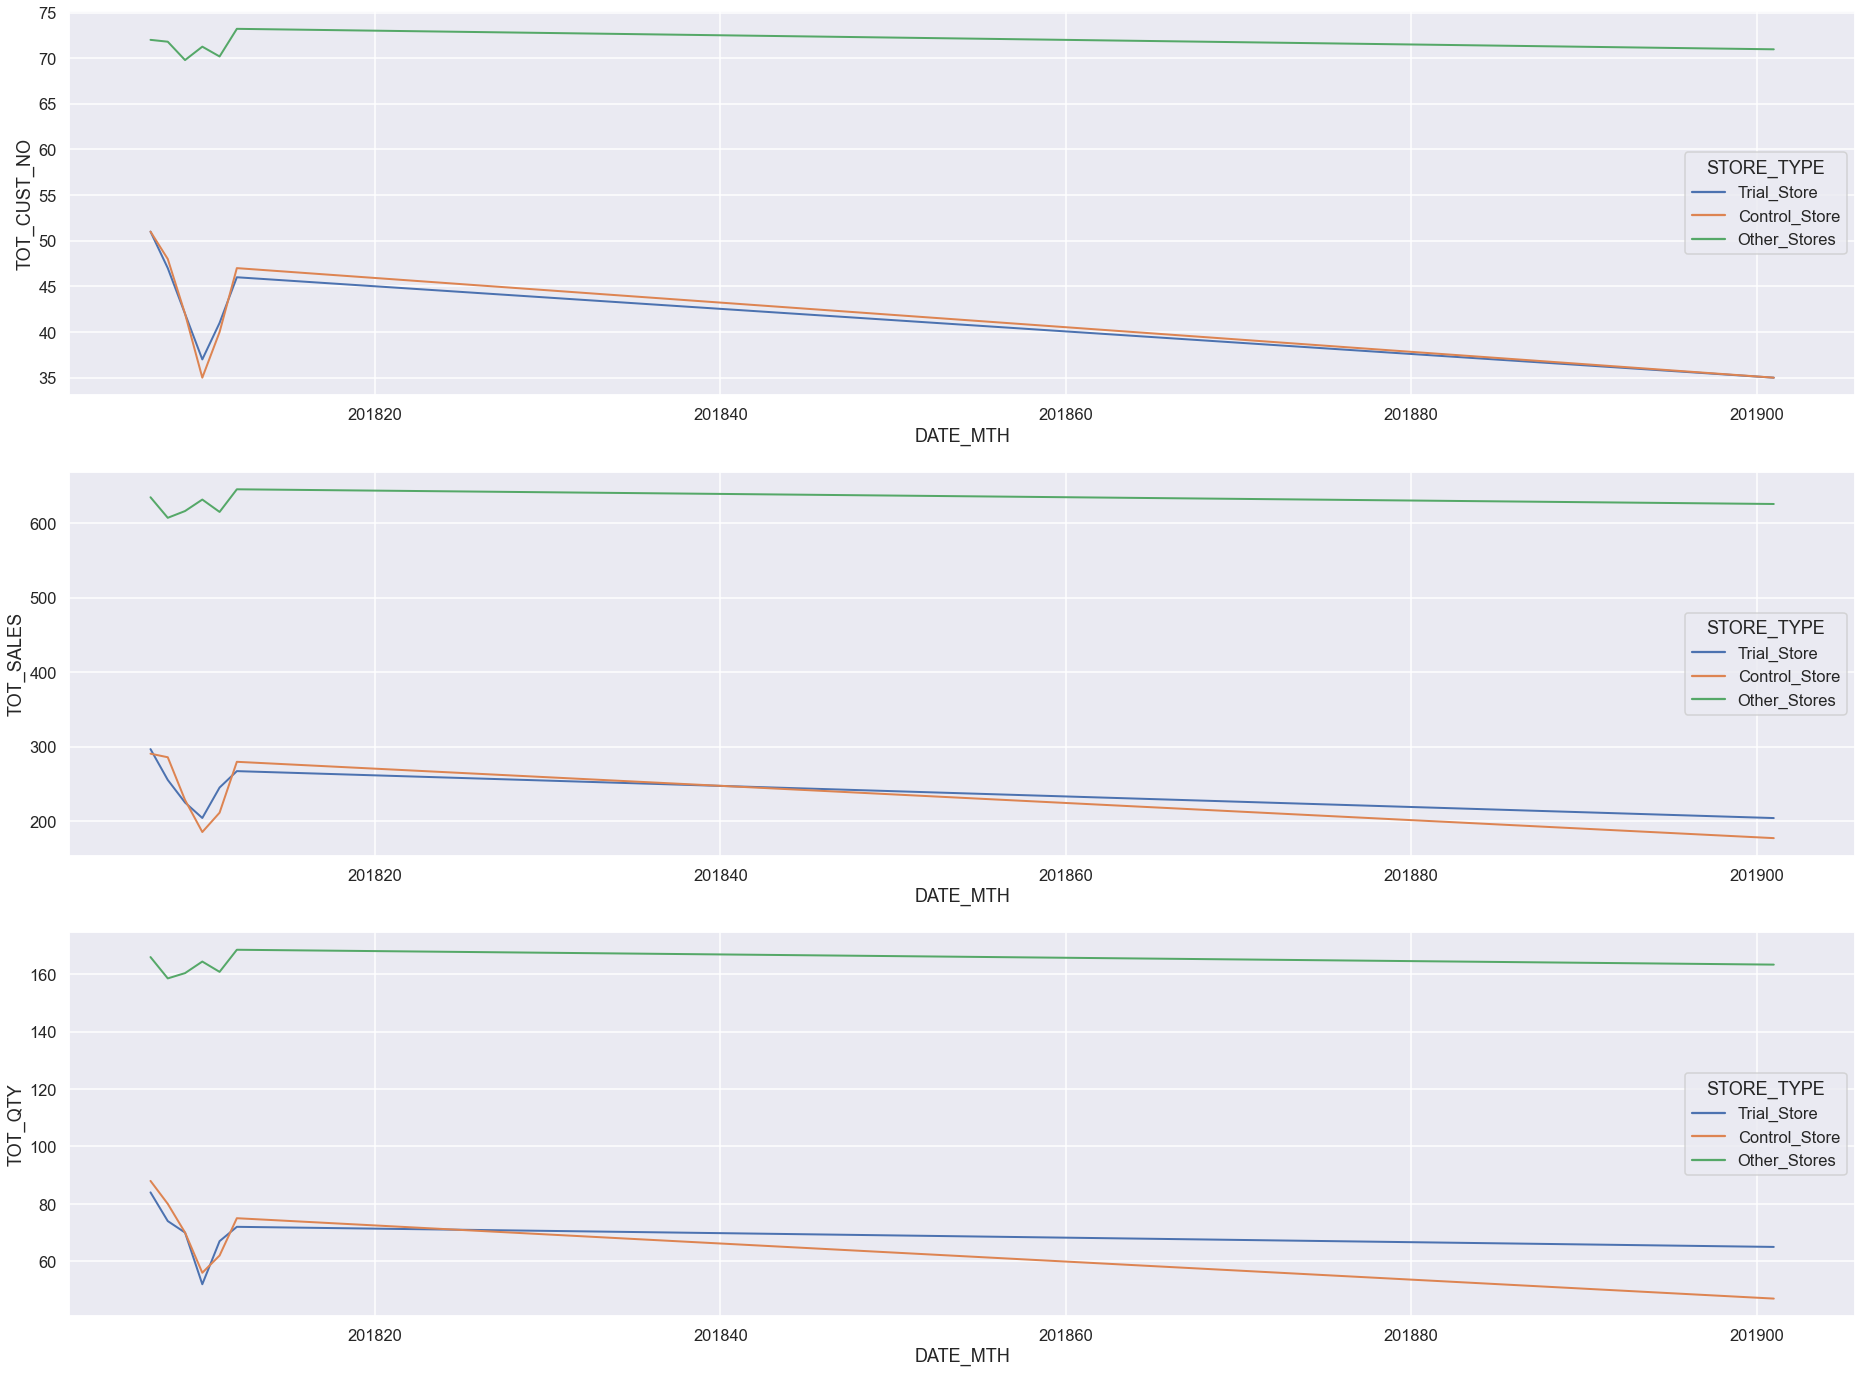

In [37]:
store_plot_pre_trial(77,233)

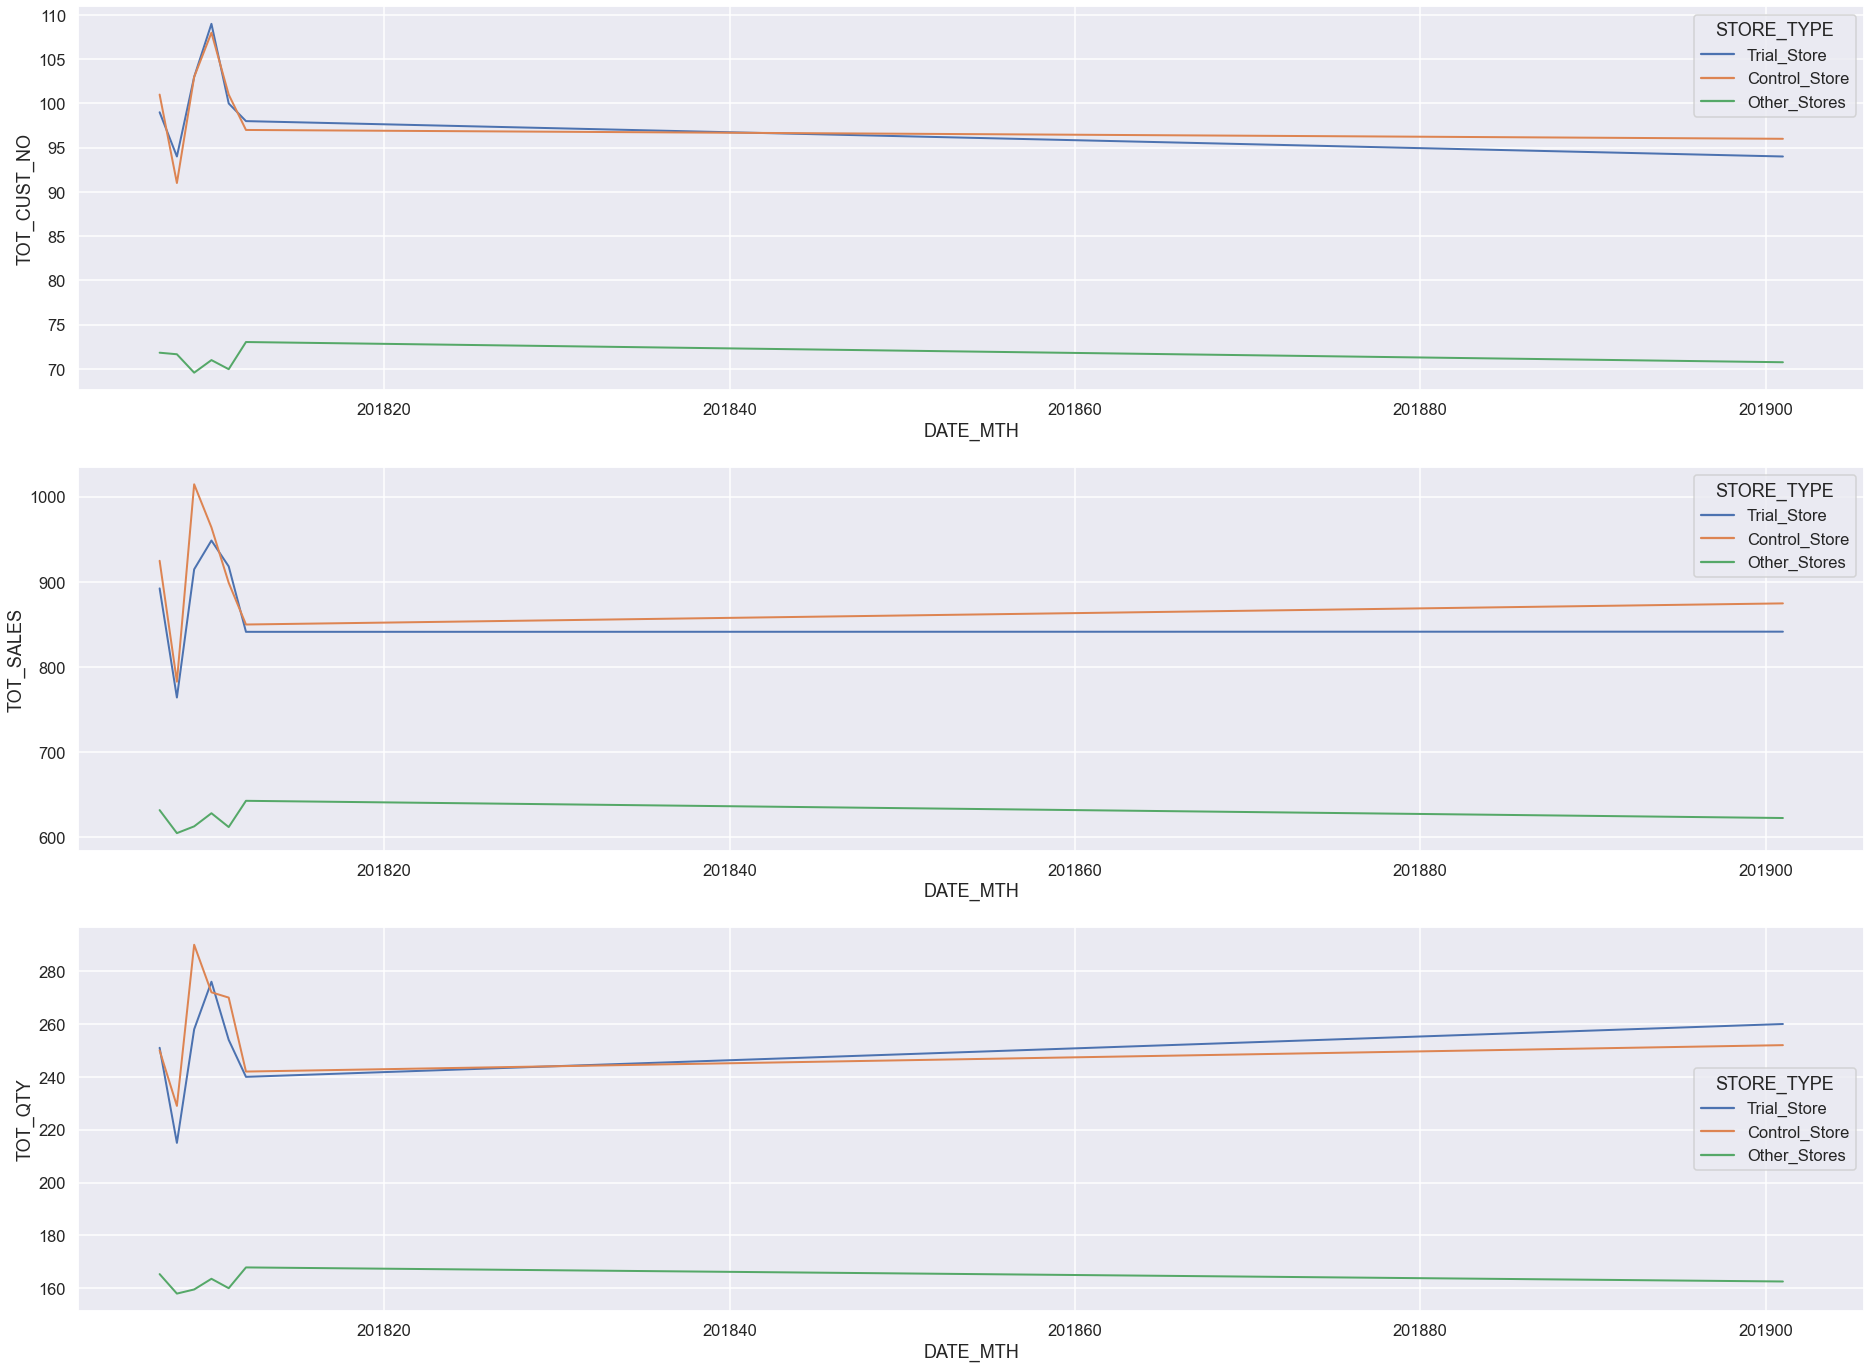

In [38]:
store_plot_pre_trial(86,155)

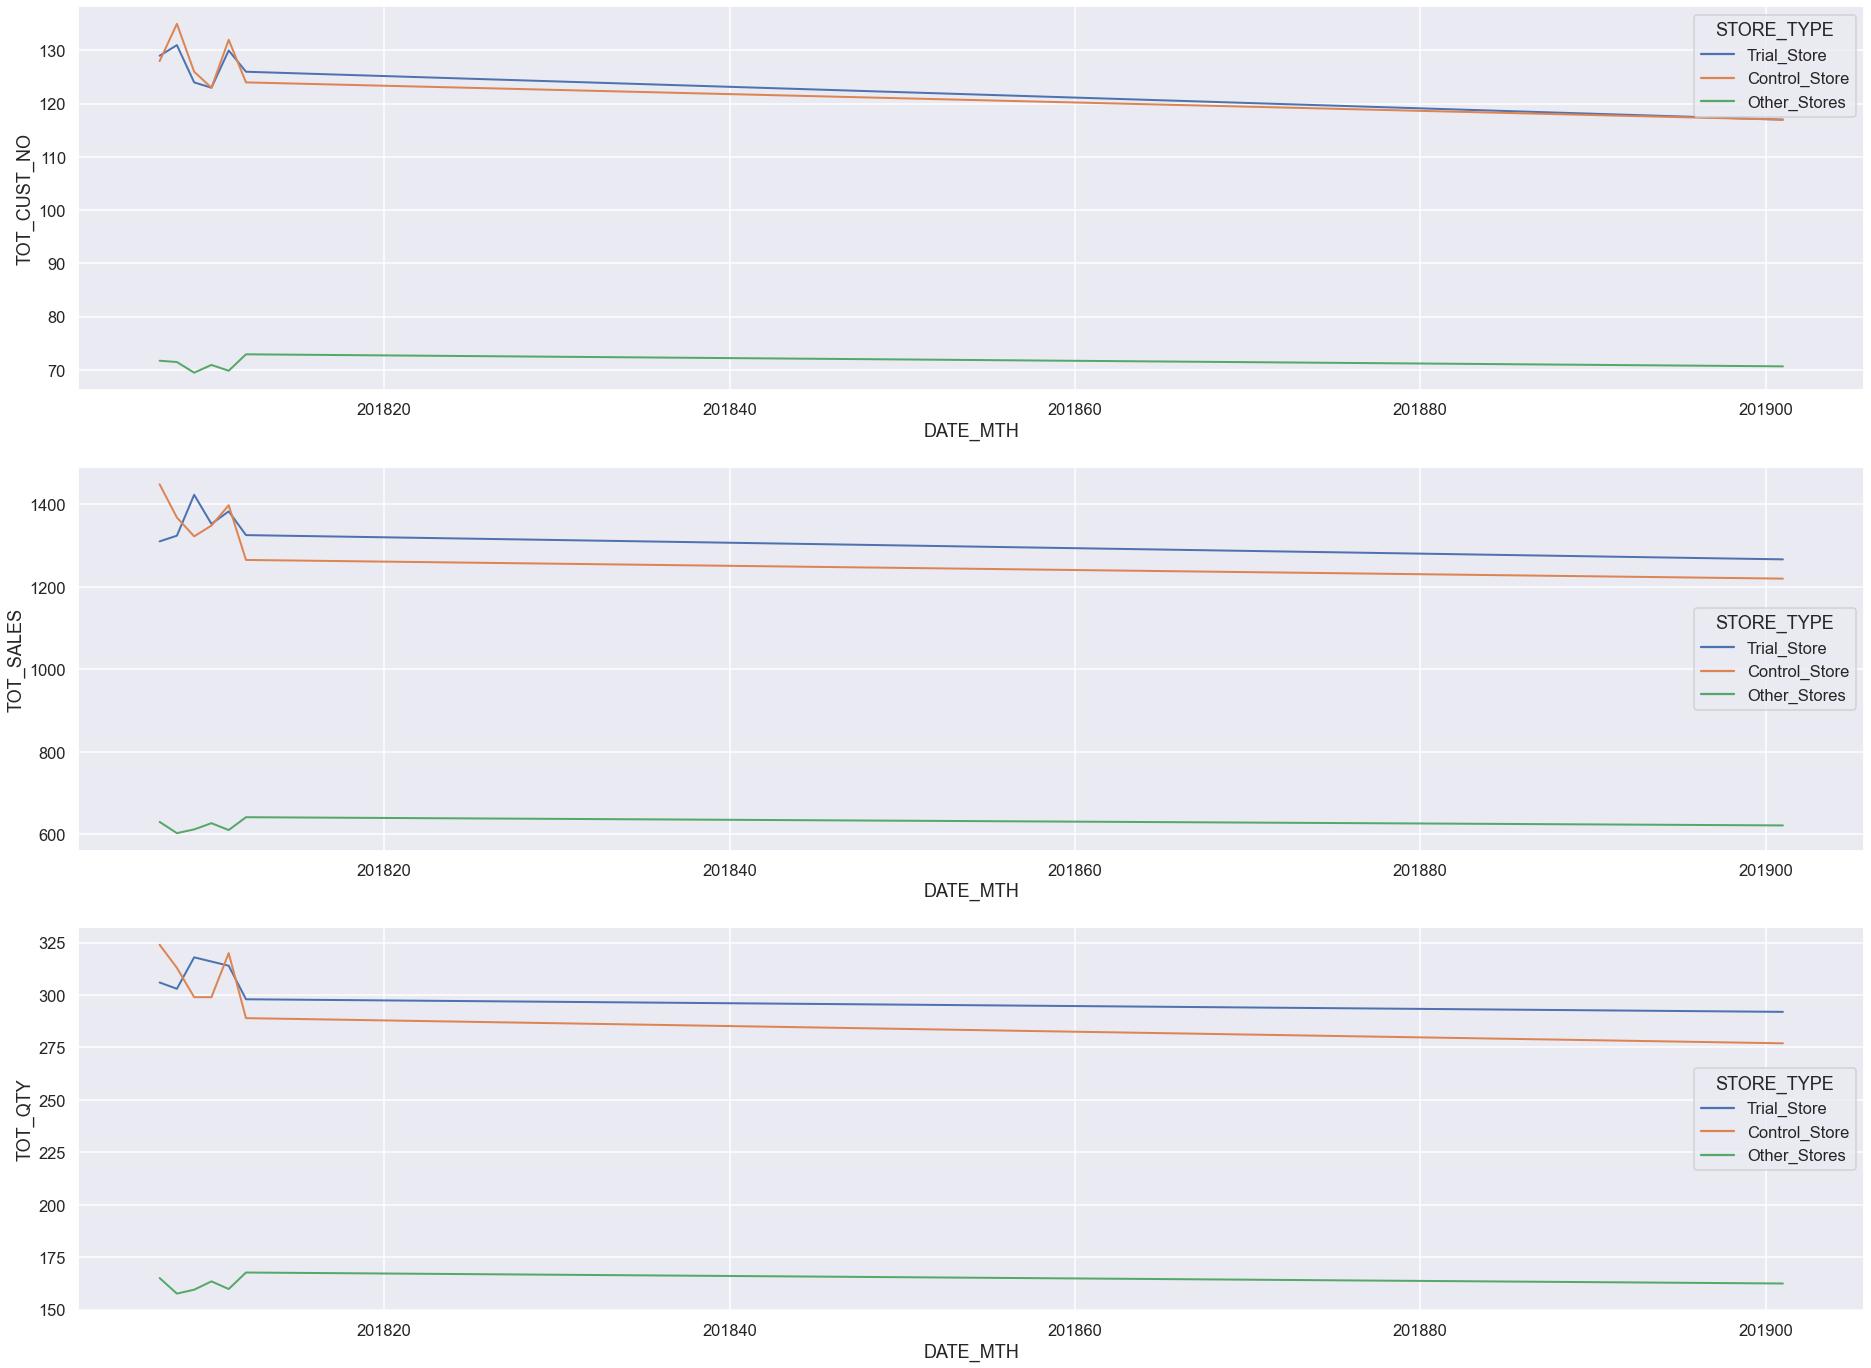

In [39]:
store_plot_pre_trial(88,237)

In [40]:
control_store_list = [233,155,237]

In [70]:
df_pre_trial.head()

,STORE_NBR,DATE_MTH,TOT_CUST_NO,TOT_TXN_NO,TOT_SALES,TOT_QTY,AVG_TXN_CUST
880,77,201807,51,55,296.8,84,1.078431
881,77,201808,47,48,255.5,74,1.021277
882,77,201809,42,44,225.2,70,1.047619
883,77,201810,37,38,204.5,52,1.027027
884,77,201811,41,44,245.3,67,1.073171


In [71]:
df_pre_control_selected = df_pre_control[df_pre_control['STORE_NBR'].isin(control_store_list)]
df_pre_control_selected.head()

,STORE_NBR,DATE_MTH,TOT_CUST_NO,TOT_TXN_NO,TOT_SALES,TOT_QTY,AVG_TXN_CUST
1793,155,201807,101,123,924.6,250,1.217822
1794,155,201808,91,119,782.7,229,1.307692
1795,155,201809,103,144,1014.4,290,1.398058
1796,155,201810,108,136,963.8,272,1.259259
1797,155,201811,101,133,898.8,270,1.316832


In [43]:
def scaling_factor(trial_store_number, control_store_number, df_pre_trial = df_pre_trial, df_pre_control_selected = df_pre_control_selected):
    trial_agg = df_pre_trial.groupby(['STORE_NBR']).agg({'TOT_SALES': 'sum', 'TOT_CUST_NO':'sum','AVG_TXN_CUST':'mean'})
    trial_agg.reset_index(inplace = True)
    control_agg = df_pre_control_selected.groupby(['STORE_NBR']).agg({'TOT_SALES': 'sum', 'TOT_CUST_NO':'sum','AVG_TXN_CUST':'mean'})
    control_agg.reset_index(inplace = True)
    
    sf_total_sales = (trial_agg.loc[trial_agg['STORE_NBR'] == trial_store_number]['TOT_SALES'].sum())/(control_agg.loc[control_agg['STORE_NBR'] == control_store_number]['TOT_SALES'].sum())
    sf_total_cust = (trial_agg.loc[trial_agg['STORE_NBR'] == trial_store_number]['TOT_CUST_NO'].sum())/(control_agg.loc[control_agg['STORE_NBR'] == control_store_number]['TOT_CUST_NO'].sum())
    sf_avg_txn_cust = (trial_agg.loc[trial_agg['STORE_NBR'] == trial_store_number]['AVG_TXN_CUST'].sum())/(control_agg.loc[control_agg['STORE_NBR'] == control_store_number]['AVG_TXN_CUST'].sum())
    print('Scaling Factors for trial store ' + str(trial_store_number) + ' and control store ' + str(control_store_number) + ' are as below' + '\n')
    print('TOT_SALES: ' + str(sf_total_sales) + '\n' + 'TOT_CUST: ' + str(sf_total_cust) + '\n' + 'AVG_TXN_CUST: ' + str(sf_avg_txn_cust))
    
    return sf_total_sales, sf_total_cust, sf_avg_txn_cust

In [44]:
scaling_factor(77, 233)

Scaling Factors for trial store 77 and control store 233 are as below

TOT_SALES: 1.023617303289553
TOT_CUST: 1.0033557046979866
AVG_TXN_CUST: 1.015909408114253


(1.023617303289553, 1.0033557046979866, 1.015909408114253)

In [45]:
scaling_factor(86, 155)

Scaling Factors for trial store 86 and control store 155 are as below

TOT_SALES: 0.9700651481287746
TOT_CUST: 1.0
AVG_TXN_CUST: 0.9734129893618191


(0.9700651481287746, 1.0, 0.9734129893618191)

In [46]:
scaling_factor(88, 237)

Scaling Factors for trial store 88 and control store 237 are as below

TOT_SALES: 1.0015583306649594
TOT_CUST: 0.9943502824858758
AVG_TXN_CUST: 1.0105858988301915


(1.0015583306649594, 0.9943502824858758, 1.0105858988301915)

In [47]:
df_trial = df_metrics[(df_metrics['STORE_NBR'].isin(trial_store_list))]
df_control = df_metrics[(df_metrics['STORE_NBR'].isin(control_store_list))]


In [72]:
df_trial.head()

,STORE_NBR,DATE_MTH,TOT_CUST_NO,TOT_TXN_NO,TOT_SALES,TOT_QTY,AVG_TXN_CUST
880,77,201807,51,55,296.8,84,1.078431
881,77,201808,47,48,255.5,74,1.021277
882,77,201809,42,44,225.2,70,1.047619
883,77,201810,37,38,204.5,52,1.027027
884,77,201811,41,44,245.3,67,1.073171


In [73]:
df_control.head()

,STORE_NBR,DATE_MTH,TOT_CUST_NO,TOT_TXN_NO,TOT_SALES,TOT_QTY,AVG_TXN_CUST
1793,155,201807,101,123,924.6,250,1.217822
1794,155,201808,91,119,782.7,229,1.307692
1795,155,201809,103,144,1014.4,290,1.398058
1796,155,201810,108,136,963.8,272,1.259259
1797,155,201811,101,133,898.8,270,1.316832


In [50]:
def generate_scaled_cont(trial_store_number, control_store_number, df_trial, df_control):
    SF_ls = ['TOT_SALES', 'TOT_CUST_NO', 'AVG_TXN_CUST']
    SF_score = scaling_factor(trial_store_number, control_store_number)
    df_control_scaled = df_control[df_control['STORE_NBR'] == control_store_number]
    for index, i in enumerate(SF_ls):
        df_control_scaled[str(i + '_SCALED')] = df_control_scaled[i] * SF_score[index]
    return df_control_scaled

In [51]:
df_control_scaled_233 = generate_scaled_cont(77, 233, df_trial, df_control)

Scaling Factors for trial store 77 and control store 233 are as below

TOT_SALES: 1.023617303289553
TOT_CUST: 1.0033557046979866
AVG_TXN_CUST: 1.015909408114253


In [52]:
df_control_scaled_155 = generate_scaled_cont(86, 155, df_trial, df_control)

Scaling Factors for trial store 86 and control store 155 are as below

TOT_SALES: 0.9700651481287746
TOT_CUST: 1.0
AVG_TXN_CUST: 0.9734129893618191


In [53]:
df_control_scaled_237 = generate_scaled_cont(88, 237, df_trial, df_control)

Scaling Factors for trial store 88 and control store 237 are as below

TOT_SALES: 1.0015583306649594
TOT_CUST: 0.9943502824858758
AVG_TXN_CUST: 1.0105858988301915


In [54]:
def concat_df(df1, df2):
    df2 = df2.rename(columns = {'TOT_CUST_NO': 'c_TOT_CUST_NO',
                                  'TOT_SALES' : 'c_TOT_SALES', 
                                  'AVG_TXN_CUST' : 'c_AVG_TXN_CUST',
                                  'TOT_CUST_NO_SCALED' : 'c_TOT_CUST_NO_SCALED',
                                  'TOT_SALES_SCALED' : 'c_TOT_SALES_SCALED', 
                                  'AVG_TXN_CUST_SCALED' : 'c_AVG_TXN_CUST_SCALED',
                                  'STORE_NBR':'c_STORE_NBR'
                                })
    df2 = df2[['DATE_MTH','c_STORE_NBR','c_TOT_CUST_NO','c_TOT_SALES','c_AVG_TXN_CUST',
                            'c_TOT_CUST_NO_SCALED','c_TOT_SALES_SCALED','c_AVG_TXN_CUST_SCALED']]
    # Homogenize the index values
    df2.index = df1.index
    df2[['t_STORE_NBR','t_TOT_CUST_NO','t_TOT_SALES','t_AVG_TXN_CUST']] = df1[['STORE_NBR','TOT_CUST_NO','TOT_SALES','AVG_TXN_CUST']]
    return df2

In [55]:
df_trial_77 = df_trial[df_trial['STORE_NBR'] == 77]
df_trial_86 = df_trial[df_trial['STORE_NBR'] == 86]
df_trial_88 = df_trial[df_trial['STORE_NBR'] == 88]

In [56]:
df_77_233 = concat_df(df_trial_77, df_control_scaled_233)
df_86_155 = concat_df(df_trial_86, df_control_scaled_155)
df_88_237 = concat_df(df_trial_88, df_control_scaled_237)

In [58]:
def cal_t_val(df):
    df['PERC_DIFF_SALES'] = ((df['t_TOT_SALES']-df['c_TOT_SALES_SCALED'])/((df['c_TOT_SALES_SCALED']+df['t_TOT_SALES'])*0.5))
    df['PERC_DIFF_CUST_NO'] = ((df['t_TOT_CUST_NO']-df['c_TOT_CUST_NO_SCALED'])/((df['c_TOT_CUST_NO_SCALED']+df['t_TOT_CUST_NO'])*0.5))
    df['PERC_DIFF_AVG_TXN_CUST'] = ((df['t_AVG_TXN_CUST']-df['c_AVG_TXN_CUST_SCALED'])/((df['c_AVG_TXN_CUST_SCALED']+df['t_AVG_TXN_CUST'])*0.5))
    std_dev_sales = np.std(df['PERC_DIFF_SALES'])
    std_dev_cust = np.std(df['PERC_DIFF_CUST_NO'])
    std_dev_txn_cust = np.std(df['PERC_DIFF_AVG_TXN_CUST'])
    df['T_VAL_SALES'] = (df['PERC_DIFF_SALES']-0)/std_dev_sales
    df['T_VAL_CUST_NO'] = (df['PERC_DIFF_CUST_NO']-0)/std_dev_cust
    df['T_VAL_AVG_TXN_CUST'] = (df['PERC_DIFF_AVG_TXN_CUST']-0)/std_dev_txn_cust
    degree_of_freedom = 8-1
    print('The critical value at 5% significant level is {} \n'.format(t.isf(0.05, degree_of_freedom)))
    
    print(df[df['DATE_MTH'].isin([201902, 201903, 201904])]['T_VAL_SALES'])
    print(df[df['DATE_MTH'].isin([201902, 201903, 201904])]['T_VAL_CUST_NO'])
    print(df[df['DATE_MTH'].isin([201902, 201903, 201904])]['T_VAL_AVG_TXN_CUST'])
    return df

In [59]:
def cal_confidence_interval(df):
    std_dev_sales = np.std(df['PERC_DIFF_SALES'])
    std_dev_cust = np.std(df['PERC_DIFF_CUST_NO'])
    std_dev_txn_cust = np.std(df['PERC_DIFF_AVG_TXN_CUST'])
    df['c_TOT_SALES_SCALED_5PERC'] = df['c_TOT_SALES_SCALED'] * (1 - std_dev_sales*2)
    df['c_TOT_SALES_SCALED_95PERC'] = df['c_TOT_SALES_SCALED'] * (1 + std_dev_sales*2)
    df['c_TOT_CUST_NO_SCALED_5PERC'] = df['c_TOT_CUST_NO_SCALED'] * (1 - std_dev_cust*2)
    df['c_TOT_CUST_NO_SCALED_95PERC'] = df['c_TOT_CUST_NO_SCALED'] * (1 + std_dev_cust*2)
    df['c_AVG_TXN_CUST_SCALED_5PERC'] = df['c_AVG_TXN_CUST_SCALED'] * (1 - std_dev_txn_cust*2)
    df['c_AVG_TXN_CUST_SCALED_95PERC'] = df['c_AVG_TXN_CUST_SCALED'] * (1 + std_dev_txn_cust*2)
    return df
    

In [60]:
def plot_trial_vs_control(df):
    df['DATE_MTH'] = pd.to_datetime(df['DATE_MTH'], format='%Y%m').apply(lambda x: x.strftime('%Y-%m'))
    for i in ['TOT_SALES', 'TOT_CUST_NO', 'AVG_TXN_CUST']:
        plt.figure(figsize =(16, 8))
        sns.lineplot(data = df, 
                               x = 'DATE_MTH', 
                               y = 't_{}'.format(i),  
                               linewidth =3, 
                               label ='TRIAL_{}'.format(i)
                               )
        sns.lineplot(data = df, 
                               x = 'DATE_MTH', 
                               y = 'c_{}_SCALED_5PERC'.format(i),  
                               linewidth =2,
                               linestyle='--',
                               label ='CONTROL_{}_SCALED_5PERC'.format(i)
                               )
        sns.lineplot(data = df, 
                               x = 'DATE_MTH', 
                               y = 'c_{}_SCALED_95PERC'.format(i),  
                               linewidth =2, 
                               linestyle='--',
                               label ='CONTROL_{}_SCALED_95PERC'.format(i)
                               )
        sns.lineplot(data = df, 
                               x = 'DATE_MTH', 
                               y = 'c_{}_SCALED'.format(i),  
                               linewidth =2, 
                               linestyle='--',
                               label ='CONTROL_{}_SCALED'.format(i)
                               )

        
        plt.axvspan('2019-02', '2019-04', color='red', alpha=0.1)
        plt.ylabel(i, fontsize=15)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
        plt.show()

In [61]:
df_77_233 = cal_t_val(df_77_233)

The critical value at 5% significant level is 1.8945786050613054 

887   -0.340368
888    1.731025
889    2.654892
Name: T_VAL_SALES, dtype: float64
887   -0.025120
888    1.641450
889    3.286984
Name: T_VAL_CUST_NO, dtype: float64
887   -1.207434
888    1.117113
889   -1.207434
Name: T_VAL_AVG_TXN_CUST, dtype: float64


In [62]:
df_77_233_ci = cal_confidence_interval(df_77_233)

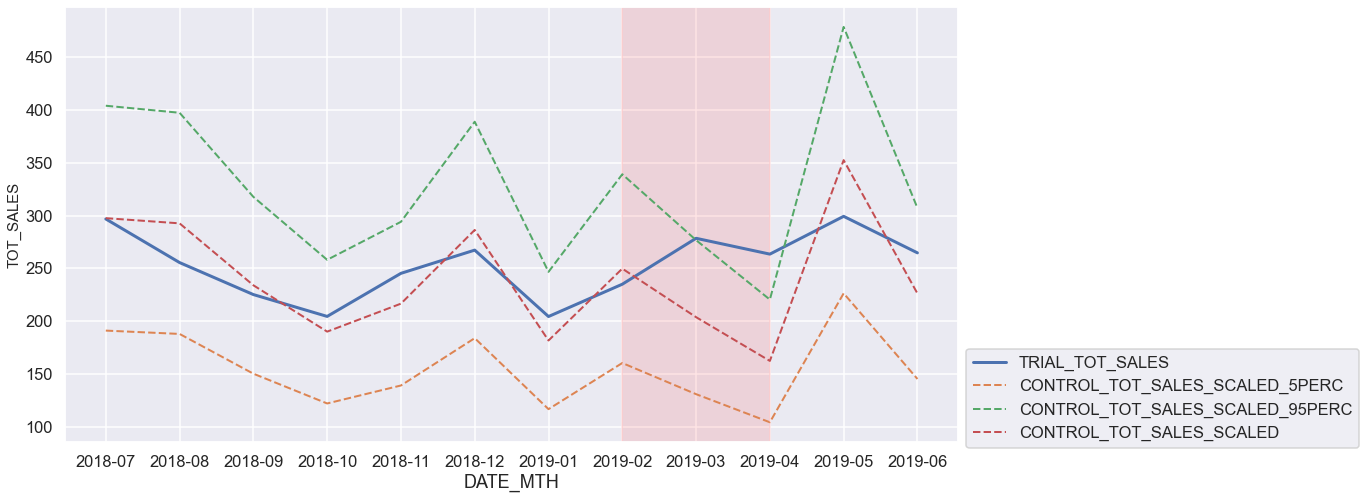

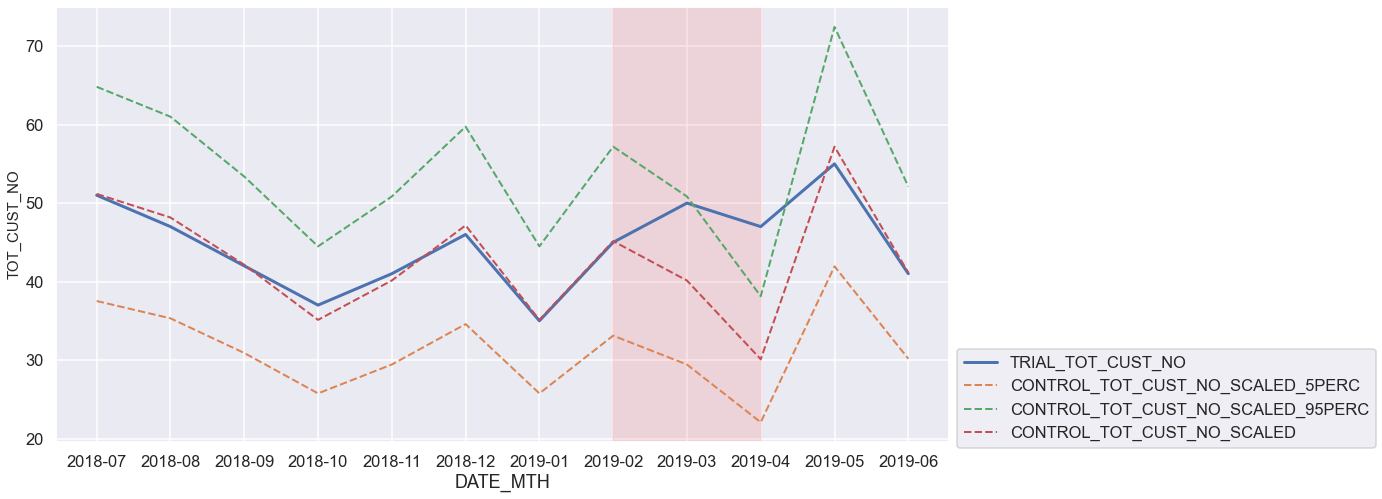

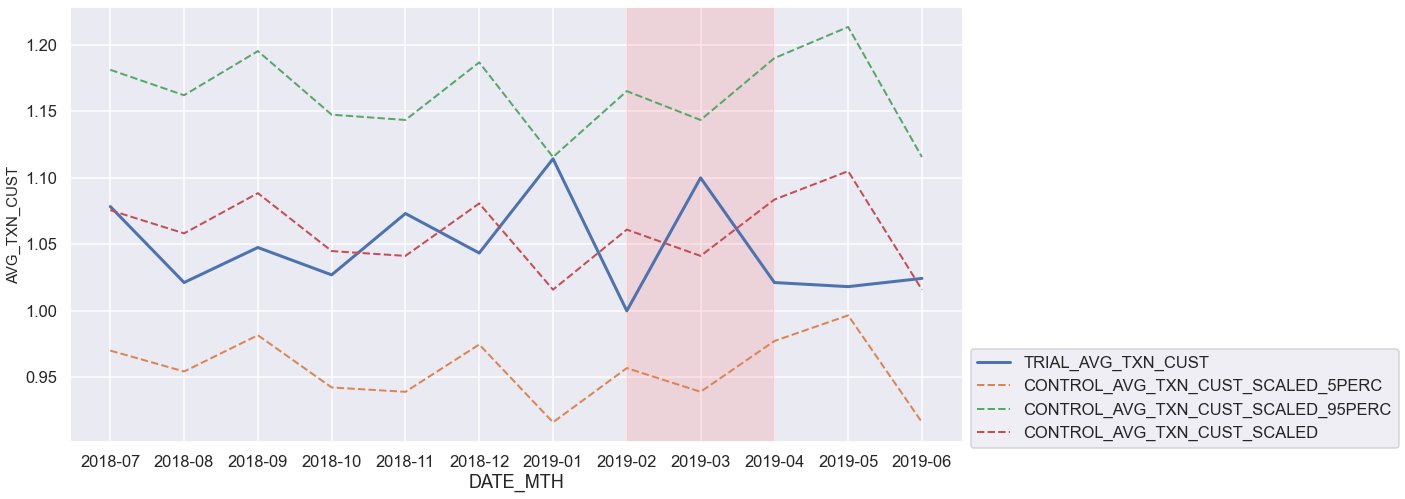

In [63]:
plot_trial_vs_control(df_77_233_ci)

In [64]:
df_86_155 = cal_t_val(df_86_155)

The critical value at 5% significant level is 1.8945786050613054 

984    0.687558
985    3.424799
986    0.434923
Name: T_VAL_SALES, dtype: float64
984    1.865056
985    3.154533
986    0.923386
Name: T_VAL_CUST_NO, dtype: float64
984    0.138721
985   -0.074667
986    0.337981
Name: T_VAL_AVG_TXN_CUST, dtype: float64


In [65]:
df_86_155_ci = cal_confidence_interval(df_86_155)

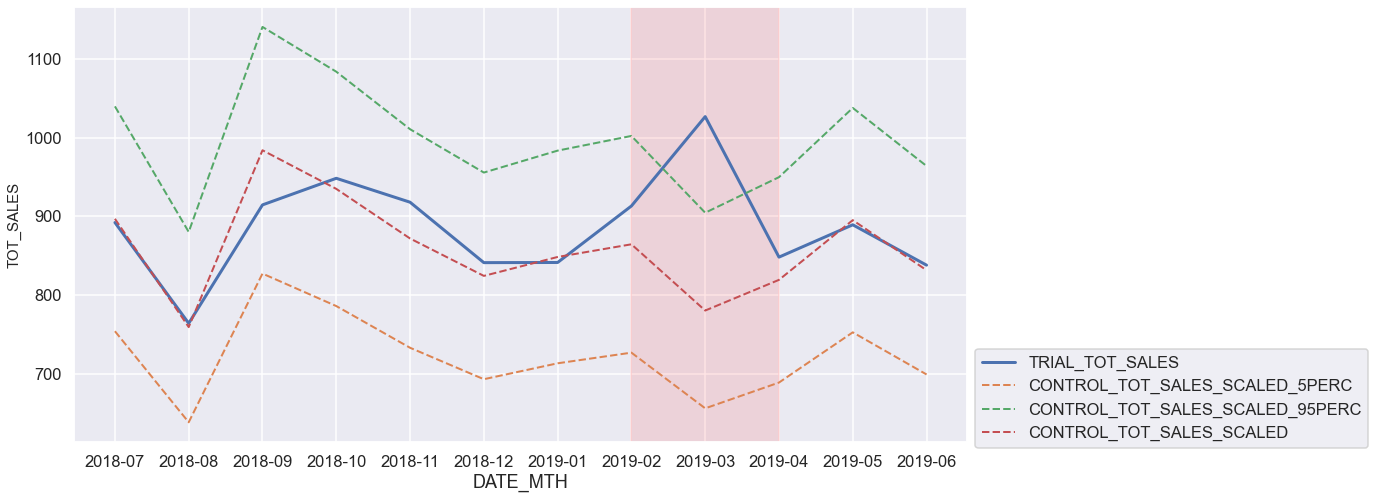

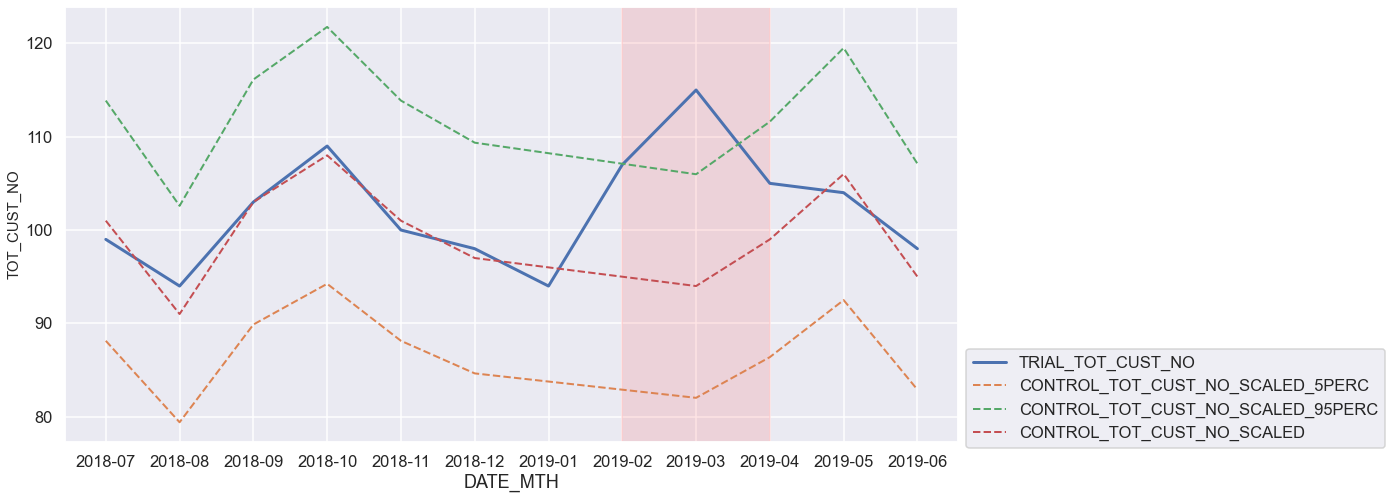

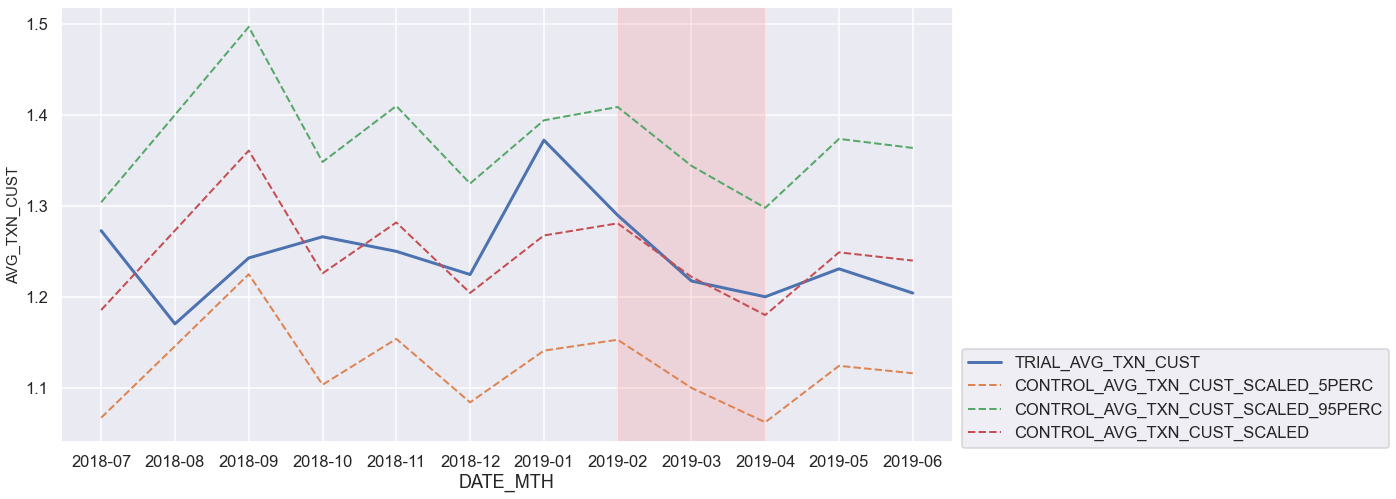

In [66]:
plot_trial_vs_control(df_86_155_ci)

In [67]:
df_88_237 = cal_t_val(df_88_237)

The critical value at 5% significant level is 1.8945786050613054 

1008   -0.299262
1009    2.245565
1010    1.988747
Name: T_VAL_SALES, dtype: float64
1008   -0.260228
1009    3.127972
1010    1.767053
Name: T_VAL_CUST_NO, dtype: float64
1008   -0.367082
1009    1.854115
1010    1.934044
Name: T_VAL_AVG_TXN_CUST, dtype: float64


In [68]:
df_88_237_ci = cal_confidence_interval(df_88_237)

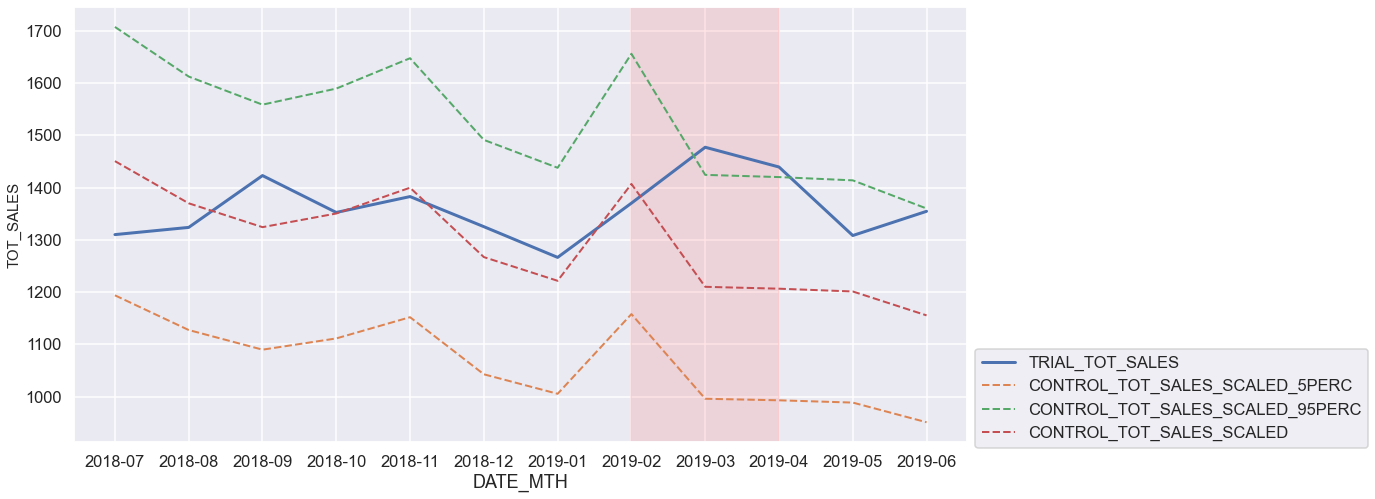

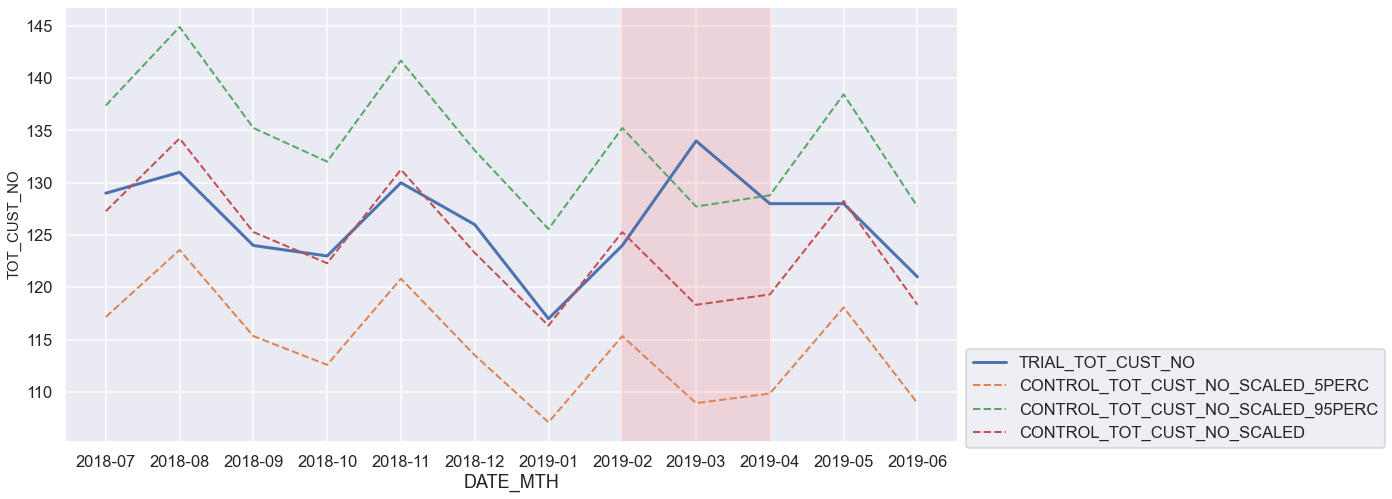

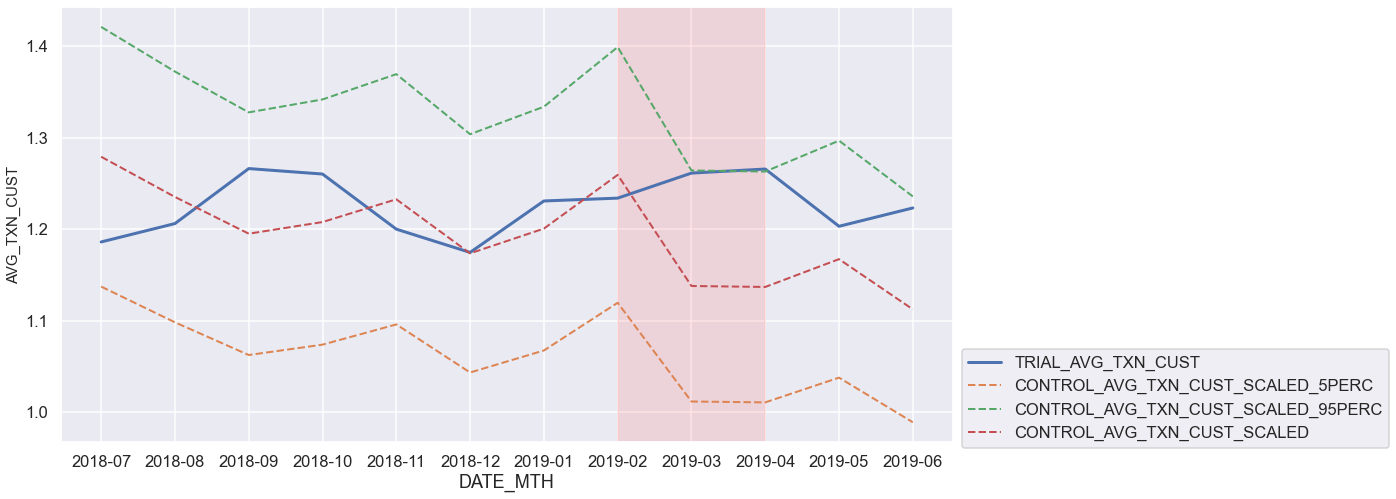

In [69]:
plot_trial_vs_control(df_88_237_ci)